### Download Data

The data is taken from http://archive.ics.uci.edu/ml/machine-learning-databases/00240/, but you can have it in the form of the UCI-HAR-Dataset.zip.

Extract it to the folder of your notebook with the solution (or suitably adjust the paths to training and test data specified below (TRAIN, TEST).  

Spcifically, the split into training and testing data is already done. The dataset contains 7352 training and 2947 test samples.  

Each sample consists of nine timeseries of float values, each of length 128.

The nine timeseries are collected by an accelerometer and a gyroscope that contain information about the motion and the orientation, respectively.

In [2]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load Data

In [3]:
# Useful Constants
TRAIN = "UCI_HAR_Dataset/train/"
TEST = "UCI_HAR_Dataset/test/"

# x-values, 'signals'
# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
X_train_signals_paths = [TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES]
X_test_signals_paths =  [TEST  + "Inertial Signals/" + signal + "test.txt"  for signal in INPUT_SIGNAL_TYPES]


# y-values, 'labels'
#Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]
N_CLASSES = len(LABELS)
y_train_path = TRAIN + "y_train.txt"
y_test_path  = TEST  + "y_test.txt"

In [4]:
# Load "X" (the neural network's training and testing inputs)
def load_X(X_signals_paths):
    X_signals = []
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)
print(X_train.shape, X_test.shape)

(7352, 128, 9) (2947, 128, 9)


In [5]:
# Load "y" (the neural network's training and testing outputs)
def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

def one_hot(y, n_classes):
    y = y.reshape(len(y))
    return np.eye(n_classes)[np.array(y, dtype=np.int32)]

def label_from_onehot(vectors):
    indices = []
    for vector in vectors:
        indices.append(np.argmax(vector))
    return np.array(indices)

Y_train = load_y(y_train_path)
Y_test = load_y(y_test_path)
print(Y_train.shape, Y_test.shape)

(7352, 1) (2947, 1)


#### Plot some samples

In [6]:
X_train_per_class = {}
for c in range(N_CLASSES):
    mask = ... # select sample of given class c
    X_train_per_class[c] = X_train[mask]

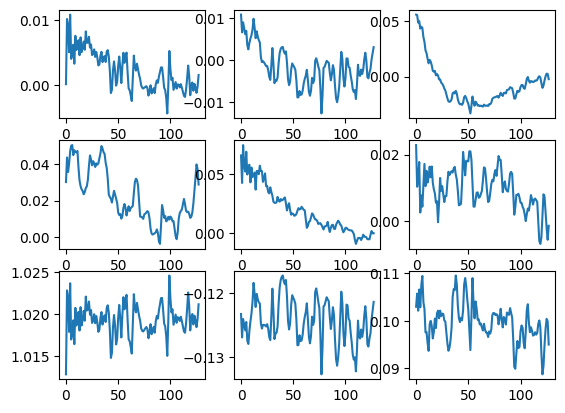

In [7]:
def plot_lines(X, nsamples):
    t = range(128)
    for i in range(9):
        plt.subplot(3,3,i+1)
        for j in range(np.minimum(X.shape[0],nsamples)):
            plt.plot(t,X[j,:,i])
    plt.show()
    
plot_lines(X_train_per_class[1], 1)

In [8]:
# Input Data
training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
means = np.mean(X_train, axis=(0,1))
stdevs = np.std(X_train, axis=(0,1))

print("X shape, Y_shape:")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print()
print("Mean / Stdev for each feature:")
for i in range(9):
    print("%7.4f | %7.4f"%(means[i], stdevs[i]))

X shape, Y_shape:
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)

Mean / Stdev for each feature:
-0.0006 |  0.1948
-0.0003 |  0.1224
-0.0003 |  0.1069
 0.0005 |  0.4068
-0.0008 |  0.3819
 0.0001 |  0.2557
 0.8047 |  0.4141
 0.0288 |  0.3910
 0.0865 |  0.3578


### Dataset

If suitable specify Dataset (e.g. in PyTorch).

In [9]:
...

Ellipsis

### Normalization

...

## Specify and Train Models

Try different architectures to solve the activity recognition problem.

At minimum implement
* Model with a single layer of SimpleRNN
* Model with a single layer of LSTM
* Model with several layers of LSTMs
* Model with several CNN layers
* MLP

Try with different number of units. Add regularisation if needed (e.g. when working with MLPs).

Report about your findings.

### Single Layer SimpleRNN

In [10]:
### START YOUR CODE
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

n_hidden = 32

sl_model = Sequential()

sl_model.add(SimpleRNN(units=n_hidden, return_sequences=False, activation='tanh',
                       input_shape=(X_train.shape[1], X_train.shape[2])))
sl_model.add(Dense(units=N_CLASSES, activation='softmax'))

# compile model
sl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# ... print model information with summary() method
sl_model.summary()

### END YOUR CODE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1344      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 1,542
Trainable params: 1,542
Non-trainable params: 0
_________________________________________________________________


In [11]:
### START YOUR CODE
batch_size = 128
n_epochs   = 50

sl_log = sl_model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_test, Y_test))


Epoch 1/50


ValueError: in user code:

    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [ ]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(sl_log.history['loss'], label='Training loss')
ax1.plot(sl_log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(sl_log.history['accuracy'], label='Training acc')
ax2.plot(sl_log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [ ]:
loss_test, metric_test = sl_model.evaluate(X_test, Y_test) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

#### Findings

...

### LSTM

In [16]:
### START YOUR CODE
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

n_hidden = 32

lstm_model = Sequential()

lstm_model.add(LSTM(units=n_hidden, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=N_CLASSES, activation='softmax', input_shape=(n_hidden,)))

# compile model
lstm_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# ... print model information with summary() method
lstm_model.summary()
### END YOUR CODE

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [17]:
### START YOUR CODE
batch_size = 128
n_epochs   = 50

lstm_log = lstm_model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_test, Y_test))



Epoch 1/50


ValueError: in user code:

    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [ ]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(lstm_log.history['loss'], label='Training loss')
ax1.plot(lstm_log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(lstm_log.history['accuracy'], label='Training acc')
ax2.plot(lstm_log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [ ]:
loss_test, metric_test = lstm_model.evaluate(X_test, Y_test) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

#### Findings

...

### Stacked LSTMs

In [13]:
### START YOUR CODE
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

n_hidden = 32

stacked_lstm_model = Sequential()

stacked_lstm_model.add(LSTM(units=n_hidden, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
stacked_lstm_model.add(LSTM(units= n_hidden, return_sequences=True))
stacked_lstm_model.add(LSTM(units=n_hidden))
stacked_lstm_model.add(Dense(units=N_CLASSES, activation='softmax', input_shape=(n_hidden,)))

# compile model
stacked_lstm_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# ... print model information with summary() method
stacked_lstm_model.summary()

### END YOUR CODE

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
lstm_2 (LSTM)                (None, 128, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 22,214
Trainable params: 22,214
Non-trainable params: 0
_________________________________________________________________


In [14]:
### START YOUR CODE
batch_size = 128
n_epochs   = 50

stacked_lstm_log = stacked_lstm_model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_test, Y_test))


Epoch 1/50


ValueError: in user code:

    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\ProgramData\anaconda3\envs\tfVenv\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [ ]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(stacked_lstm_log.history['loss'], label='Training loss')
ax1.plot(stacked_lstm_log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(stacked_lstm_log.history['accuracy'], label='Training acc')
ax2.plot(stacked_lstm_log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [ ]:
loss_test, metric_test = stacked_lstm_model.evaluate(X_test, Y_test) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

#### Findings

...

### CNN (Conv1d)

In [ ]:
### START YOUR CODE

model = ...
...

### END YOUR CODE

Ellipsis

In [ ]:
### START YOUR CODE
batch_size = ...
n_epochs   = ...


In [ ]:
...

Ellipsis

#### Findings

...

### MLP

In [ ]:
### START YOUR CODE

model = ...
...

### END YOUR CODE

Ellipsis

In [ ]:
### START YOUR CODE
batch_size = ...
n_epochs   = ...


In [ ]:
...

Ellipsis

#### Findings

...